In [2]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import xgboost as xgb
import pandas as pd
# from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [10]:
# load data
X_train = np.load("X_train_with_stopwords.npy")
y_train = np.load("y_train_with_stopwords.npy")

In [ ]:
# shuffle data and get KFold cross validation splits
kf = KFold(n_splits=6, shuffle=True, random_state=67)

In [ ]:
# set KNN hyperparameters
k = 4

In [ ]:
# train and evaluate model
accuracies = []
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
#     model = KNeighborsClassifier(n_neighbors=k, weights="distance")
#     model = xgb.XGBClassifier()
    model.fit(X_train[train_index], y_train[train_index])
    y_pred = model.predict(X_train[test_index])
    y_true = y_train[test_index]

    accuracies.append(accuracy_score(y_true, y_pred))
    print(f"Fold {i+1} Accuracy: {accuracies[-1]}")

    print(f"Fold {i+1} Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.show()

    print("------------")

NameError: name 'model' is not defined

In [ ]:
# define search space
space = {
    'n_estimators': hp.quniform('n_estimators', 1000, 1008, 8),
    'num_parallel_tree': hp.quniform('num_parallel_tree', 1, 8, 1),
    'max_depth': hp.quniform('max_depth', 4, 18, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(2)),
    'gamma': hp.uniform('gamma', 0.01, 10),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
#     'scale_pos_weight': hp.uniform('scale_pos_weight', 1, 10)
}

def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'num_parallel_tree': int(params['num_parallel_tree']),
        'max_depth': int(params['max_depth']),
        'learning_rate': params['learning_rate'],
        'gamma': params['gamma'],
        'min_child_weight': int(params['min_child_weight']),
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'early_stopping_rounds': 10,
#         'scale_pos_weight': params['scale_pos_weight']
    }

    model = xgb.XGBClassifier(**params)
    train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=100, random_state=67)
    model.fit(train_x, train_y, eval_set = [(val_x, val_y)])
    y_pred = model.predict(val_x)
    y_true = val_y

    loss = accuracy_score(y_true, y_pred)

    return {'loss': -loss, 'status': STATUS_OK}

# Initialize trials and run optimization
trials = Trials()
best = (
    fmin(fn=objective,
        space=space,
        algo=tpe.suggest,
        max_evals=10,
        trials=trials,
        rstate=np.random.default_rng(67)
    )
)

[0]	validation_0-logloss:0.61928
[1]	validation_0-logloss:0.55503
[2]	validation_0-logloss:0.49998
[3]	validation_0-logloss:0.45458
[4]	validation_0-logloss:0.41496
[5]	validation_0-logloss:0.38035
[6]	validation_0-logloss:0.35067
[7]	validation_0-logloss:0.32426
[8]	validation_0-logloss:0.30121
[9]	validation_0-logloss:0.28107
[10]	validation_0-logloss:0.26257
[11]	validation_0-logloss:0.24644
[12]	validation_0-logloss:0.23177
[13]	validation_0-logloss:0.21881
[14]	validation_0-logloss:0.20795
[15]	validation_0-logloss:0.19642
[16]	validation_0-logloss:0.18560
[17]	validation_0-logloss:0.17675
[18]	validation_0-logloss:0.16816
[19]	validation_0-logloss:0.16084
[20]	validation_0-logloss:0.15261
[21]	validation_0-logloss:0.14615
[22]	validation_0-logloss:0.14063
[23]	validation_0-logloss:0.13522
[24]	validation_0-logloss:0.13079
[25]	validation_0-logloss:0.12519
[26]	validation_0-logloss:0.12040
[27]	validation_0-logloss:0.11689
[28]	validation_0-logloss:0.11276
[29]	validation_0-loglos

In [1]:
# no stopwords best parameters n_estimators 1000, num_parallel_tree 3, max depth 13, learning rate 0.186, gamma 0.414, min_child_weight 7, subsample 0.741, colsample_bytree 0.864

best_params = {
    'n_estimators': int(best['n_estimators']),
    'num_parallel_tree': int(best['num_parallel_tree']),
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'gamma': best['gamma'],
    'min_child_weight': int(best['min_child_weight']),
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
#     'scale_pos_weight': best['scale_pos_weight']
}
print(best_params)

NameError: name 'best' is not defined

In [ ]:
# stopwords bets parameters {'n_estimators': 1008, 'num_parallel_tree': 8, 'max_depth': 7, 'learning_rate': np.float64(0.10070194293542375), 'gamma': np.float64(4.415844894872508), 'min_child_weight': 5, 'subsample': np.float64(0.5075368686048247), 'colsample_bytree': np.float64(0.5266633220469938)}

In [ ]:
# display results
print("Average Accuracy:", np.mean(accuracies))

Average Accuracy: 0.8982683982683982


In [ ]:
# load test data
X_test = np.load("X_test_with_stopwords.npy")
y_test = np.load("y_test_with_stopwords.npy")
# test_indices = np.load("test_indices.npy")

In [ ]:
model = xgb.XGBClassifier(**best_params, early_stopping_rounds=10)
# model = KNeighborsClassifier(n_neighbors=k, weights="distance")
train_x, eval_x, train_y, eval_y = train_test_split(X_train, y_train, test_size=100, random_state=67)
model.fit(train_x, train_y, eval_set = [(eval_x, eval_y)])
y_pred = model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

[0]	validation_0-logloss:0.61928
[1]	validation_0-logloss:0.55503
[2]	validation_0-logloss:0.49998
[3]	validation_0-logloss:0.45458
[4]	validation_0-logloss:0.41496
[5]	validation_0-logloss:0.38035
[6]	validation_0-logloss:0.35067
[7]	validation_0-logloss:0.32426
[8]	validation_0-logloss:0.30121
[9]	validation_0-logloss:0.28107
[10]	validation_0-logloss:0.26257
[11]	validation_0-logloss:0.24644
[12]	validation_0-logloss:0.23177
[13]	validation_0-logloss:0.21881
[14]	validation_0-logloss:0.20795
[15]	validation_0-logloss:0.19642
[16]	validation_0-logloss:0.18560
[17]	validation_0-logloss:0.17675
[18]	validation_0-logloss:0.16816
[19]	validation_0-logloss:0.16084
[20]	validation_0-logloss:0.15261
[21]	validation_0-logloss:0.14615
[22]	validation_0-logloss:0.14063
[23]	validation_0-logloss:0.13522
[24]	validation_0-logloss:0.13079
[25]	validation_0-logloss:0.12519
[26]	validation_0-logloss:0.12040
[27]	validation_0-logloss:0.11689
[28]	validation_0-logloss:0.11276
[29]	validation_0-loglos

Test Confusion Matrix:


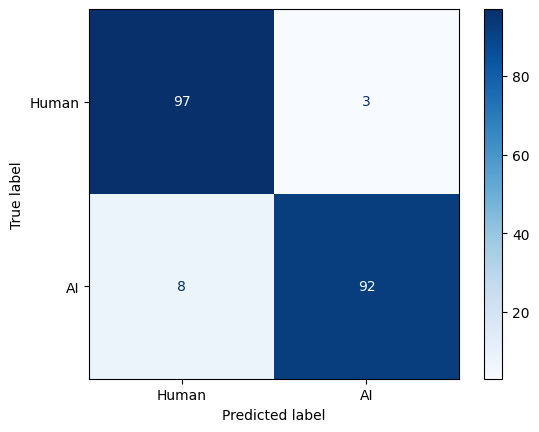

In [ ]:
print("Test Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Human", "AI"], cmap="Blues")
plt.show()

In [ ]:
model.feature_importances_

array([0.00026798, 0.00352295, 0.00079974, ..., 0.        , 0.        ,
       0.00205453], dtype=float32)

In [ ]:
indices = np.argsort(model.feature_importances_)[::-1]
print(indices[:20])
print(model.feature_importances_[indices][:20])

[3939 2731  526 2036 1213  634   31  648   42 1236 2325  956  933 1758
  909 3961 2651  637 7194 3638]
[0.02072511 0.01658005 0.01552307 0.012145   0.01107832 0.01012309
 0.00997185 0.00963804 0.00947276 0.00934745 0.00896381 0.00890127
 0.00841914 0.00841507 0.00824077 0.00814964 0.00810141 0.00797732
 0.00775    0.00773523]


In [ ]:
print(len(model.feature_importances_))

10000


39 39 1
39 39 1
27 31 0
5 26 0
20 36 0
12 13 0
6 34 0
0 31 0
6 48 0
0 42 0
12 36 0
23 25 0
9 56 0
9 33 0
17 58 0
9 9 1
39 61 0
26 51 0
6 37 0
71 94 0
36 38 0
48 49 0
9 64 0
33 83 0
14 26 0
28 71 0
27 72 0
1 85 0
61 75 0
48 72 0
54 60 0
14 22 0
74 74 1
3 26 0
1 74 0
16 38 0
92 92 1
31 86 0
6 38 0
10 98 0
17 37 0
21 57 0
33 99 0
1 41 0
4 27 0
30 41 0
38 56 0
0 39 0
67 80 0
10 33 0
6 22 0


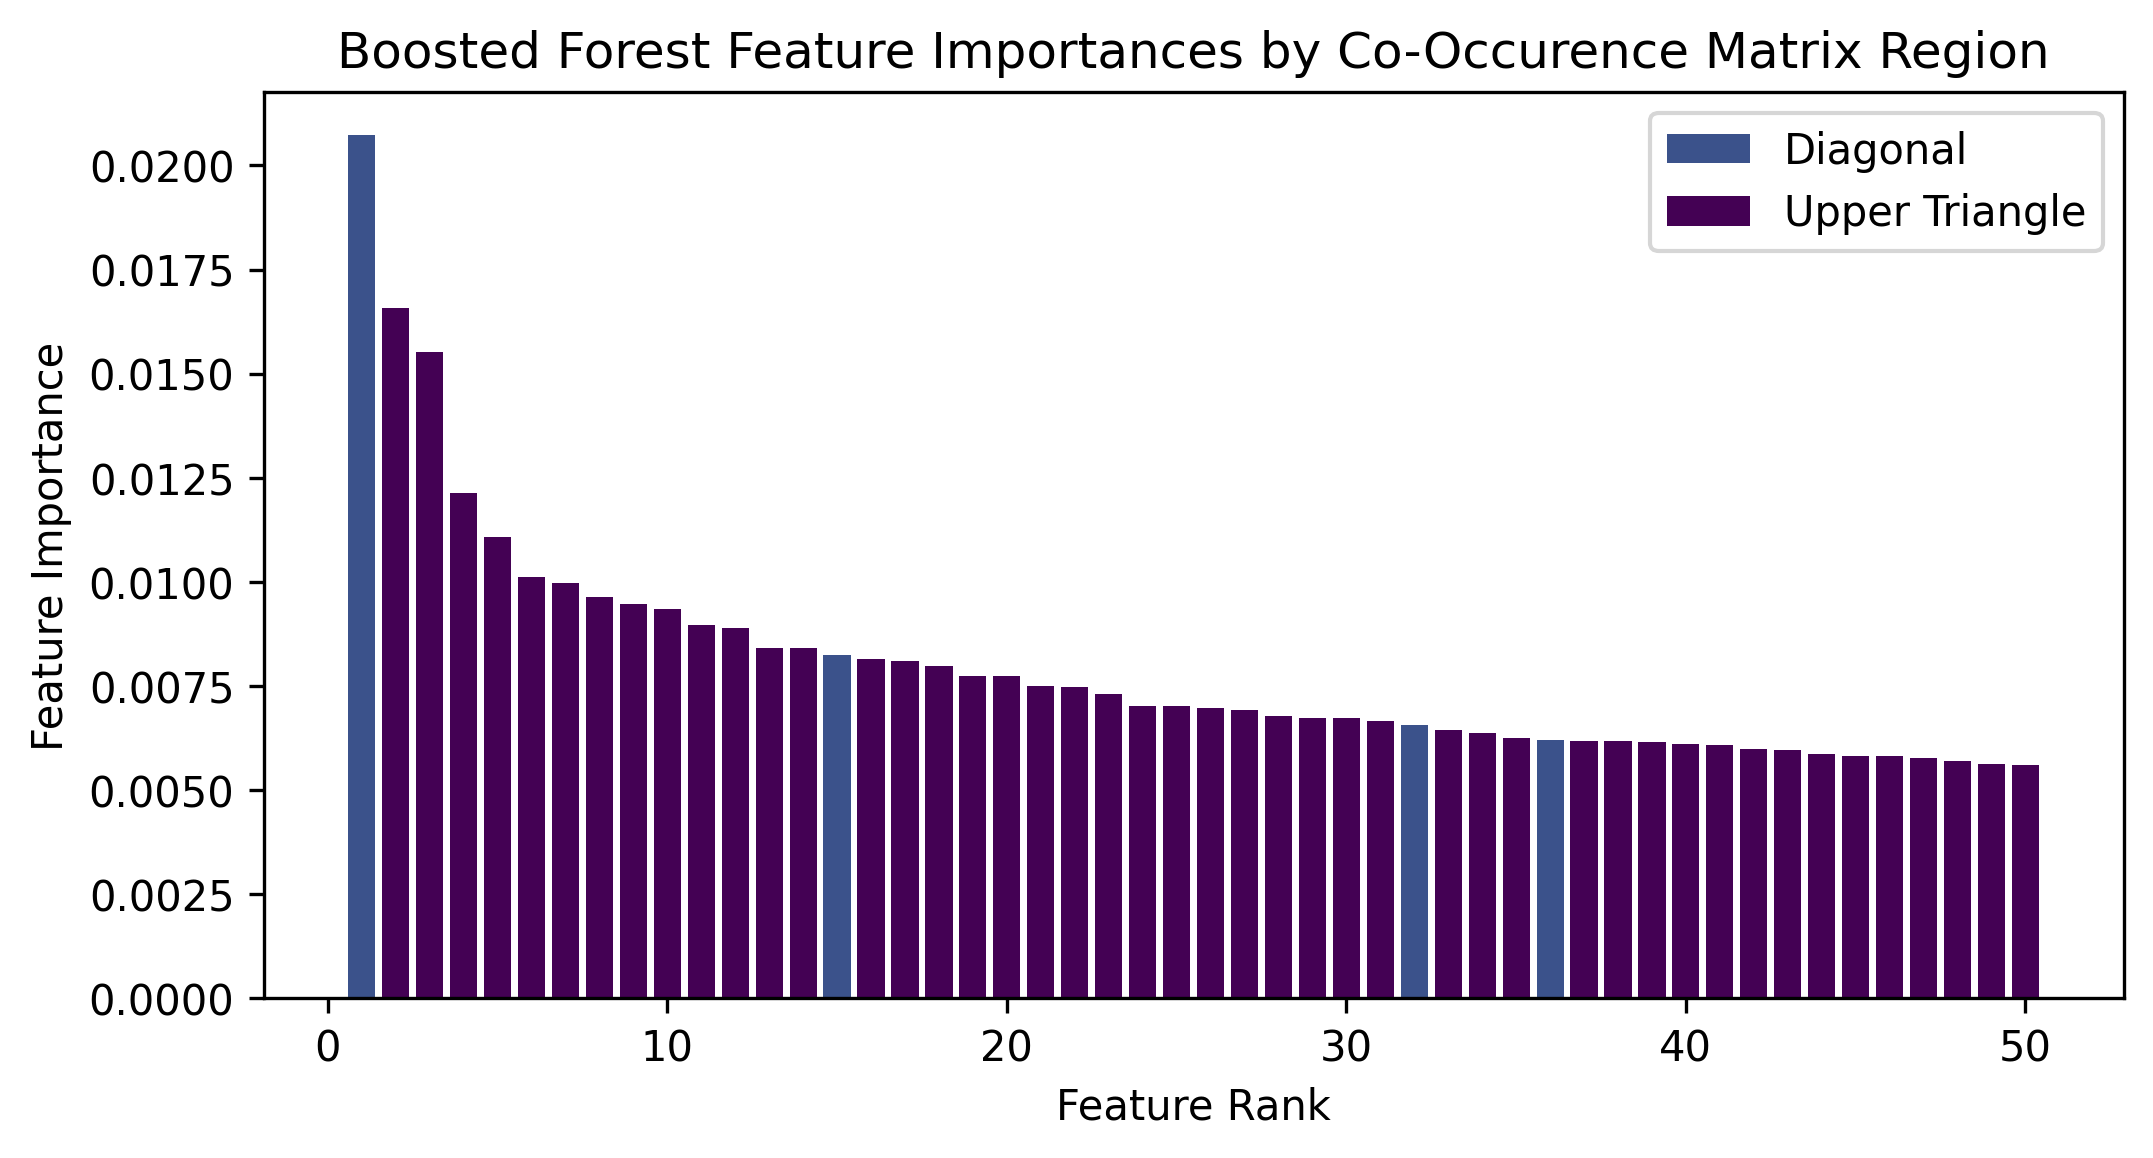

In [ ]:
num_bars = 50
colors = ['#440154', '#3b528b', '#FFFF00']
plt.figure(figsize=(8,4), dpi=300)
bars = plt.bar(x=np.arange(num_bars) + 1, height=model.feature_importances_[indices][:num_bars], color=[colors[i] for i in np.vectorize(get_region)(indices[:num_bars])])
plt.xlabel("Feature Rank")
plt.ylabel("Feature Importance")
plt.title("Boosted Forest Feature Importances by Co-Occurence Matrix Region")
plt.legend(bars, ['Diagonal', 'Upper Triangle'])
plt.show()

In [ ]:
def get_region(idx, n=100):
    i = idx // n
    j = idx % n

    if i == j:
        print(i, j, 1)
        return 1
    elif i < j:
        print(i, j, 0)
        return 0
    else:
        print(i, j, 2)
        return 2

In [ ]:
for threshold in np.arange(7) + 3:
    X_stratified = [X_test[i] for i in range(len(X_test)) if threshold - 1 <= y_test[i] <= threshold]
    y_stratified = [y_test[i] for i in range(len(X_test)) if threshold - 1 <= y_test[i] <= threshold]
    print(accuracy_score(model.predict(X_stratified), y_stratified))

ValueError: ('Expecting 2 dimensional numpy.ndarray, got: ', (0,))

In [ ]:
test_df = pd.read_csv("preprocessed_test.csv")
test_df

,Unnamed: 0,Question,Essay,AI Essay,Examiner_Commen,Overall
0,225,Write about the following topic.In some parts ...,people nowdays really interested find family h...,many country people become interested discover...,NaN,5.0
1,15,Some countries achieve international sports by...,country attain international sport make bulidi...,country focus construct specialise sport facil...,NaN,6.5
2,577,Some people think that hosting international s...,economic value add country host international ...,host international sport event often spark deb...,NaN,7.5
3,817,The Internet is now used all around the world ...,nowadays internet become without doubt powerfu...,internet become global mean people learn conne...,NaN,7.5
4,1203,Write about the following topic:Some people th...,debatable issue regard competition cooperation...,ongoing debate best approach raise wellrounded...,NaN,8.5
...,...,...,...,...,...,...
95,1391,Nowadays environmental problems are too big to...,essential problem numberplaceholder st century...,environmental issue reach vast scale difficult...,"This is a very good essay, a Band 7+ candidate...",7.0
96,1339,"High-rise vs. low-rise buildings, which soluti...",city create new housing grow population constr...,urban population continue expand city planner ...,NaN,8.0
97,31,The best way to teach children to cooperate is...,day firmly believe efficient method teach chil...,often claim encouraging child participate team...,NaN,8.0
98,349,Write about the following topic:In many countr...,science fundamental subject significant develo...,science subject often consider essential progr...,NaN,6.0


In [ ]:
test_indices

array([ 225.,  225.,   15.,   15.,  577.,  577.,  817.,  817., 1203.,
       1203.,  689.,  689.,  977.,  977., 1350., 1350., 1183., 1183.,
       1384., 1384., 1332., 1332.,  943.,  943., 1281., 1281., 1353.,
       1353., 1340., 1340.,  339.,  339.,  213.,  213.,  547.,  547.,
        401.,  401., 1245., 1245.,  495.,  495.,  865.,  865.,   73.,
         73., 1013., 1013.,  151.,  151.,  461.,  461.,  297.,  297.,
        899.,  899., 1358., 1358., 1073., 1073.,  961.,  961.,  953.,
        953.,  383.,  383.,  999.,  999.,  701.,  701.,  559.,  559.,
        715.,  715., 1279., 1279.,  467.,  467.,  677.,  677., 1221.,
       1221., 1290., 1290.,  709.,  709., 1179., 1179., 1314., 1314.,
       1426., 1426.,  623.,  623., 1405., 1405.,  291.,  291.,  177.,
        177.,  111.,  111.,  537.,  537.,  965.,  965.,  651.,  651.,
        561.,  561., 1410., 1410., 1376., 1376.,  825.,  825.,  185.,
        185.,   55.,   55.,   25.,   25.,  635.,  635., 1415., 1415.,
        123.,  123.,

In [ ]:
quality_scores = [test_df["Overall"].loc[int(idx)] for idx in test_indices][::2]

KeyError: 225